In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import pandas as pd
import tensorflow as tf
import keras
from keras.callbacks import LearningRateScheduler
import math

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print('Shape of X_train is' , x_train.shape)
print('Shape of Y_train is' , y_train.shape)
print('Shape of X_test is' , x_test.shape)
print('Shape of Y_test is' , y_test.shape)

Shape of X_train is (50000, 32, 32, 3)
Shape of Y_train is (50000, 1)
Shape of X_test is (10000, 32, 32, 3)
Shape of Y_test is (10000, 1)


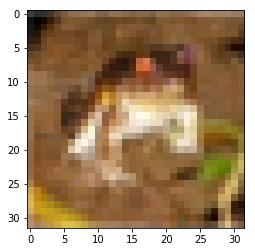

In [5]:
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.show()

In [6]:
#One Hot Encoding of the Response Variable

from keras.utils import to_categorical
y_train_encode = to_categorical(y_train)
y_test_encode = to_categorical(y_test)

In [7]:
x_tr = (x_train/255) - 0.5
x_te = (x_test/255) - 0.5

In [8]:
#Normalize the data

#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
#Model Building

from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU
#Model

model = Sequential()

#First Layer
model.add (Conv2D(16, (3,3), activation = "relu", padding = 'same' , input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add (Conv2D(16, (3,3), activation = "relu", padding = 'same' , input_shape=(32,32,3)))
model.add(BatchNormalization())
#Second Layer 
model.add( MaxPooling2D( pool_size = (2,2), padding= 'valid'))

model.add(Dropout(0.25))
#Third Layer
model.add (Conv2D(32, (2,2), padding = 'same',activation = "relu"))
model.add(BatchNormalization())
model.add (Conv2D(32, (2,2), padding = 'same',activation = "relu"))
model.add(BatchNormalization())

#Forth Layer
model.add( MaxPooling2D( pool_size = (2,2),padding = 'valid'))
model.add(Dropout(0.25))
#Fifth Layer
model.add (Conv2D(64, (3,3), activation = "relu"))
model.add(BatchNormalization())
model.add (Conv2D(64, (3,3), activation = "relu"))
model.add(BatchNormalization())

#Sixth Layer
#model.add( MaxPooling2D( pool_size = (2,2)))

#Flatten Layer

model.add(Flatten())

model.add( Dense(1000, activation = "relu"))
model.add( Dense(1000, activation = "relu"))
model.add( Dense(10, activation = "softmax"))
    

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)       

In [11]:
#Compilation of Model
tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1=0.9, beta_2=0.999, amsgrad=True)
model.compile( loss = "sparse_categorical_crossentropy", optimizer = 'adam', metrics = ['accuracy'])

In [12]:
#Training of Model
nndl = model.fit(x_tr, y_train, batch_size =256, epochs =15, shuffle= True,  validation_split = 0.2 )

Train on 40000 samples, validate on 10000 samples
Epoch 1/15
40000/40000 [==============================] - 143s 4ms/step - loss: 1.5345 - accuracy: 0.4480 - val_loss: 4.5548 - val_accuracy: 0.1003
Epoch 2/15
40000/40000 [==============================] - 137s 3ms/step - loss: 1.1278 - accuracy: 0.5951 - val_loss: 4.9915 - val_accuracy: 0.1188
Epoch 3/15
40000/40000 [==============================] - 140s 3ms/step - loss: 0.9600 - accuracy: 0.6586 - val_loss: 2.3159 - val_accuracy: 0.3137
Epoch 4/15
40000/40000 [==============================] - 138s 3ms/step - loss: 0.8403 - accuracy: 0.7004 - val_loss: 0.9883 - val_accuracy: 0.6570
Epoch 5/15
40000/40000 [==============================] - 136s 3ms/step - loss: 0.7390 - accuracy: 0.7343 - val_loss: 0.8249 - val_accuracy: 0.7189
Epoch 6/15
40000/40000 [==============================] - 136s 3ms/step - loss: 0.6477 - accuracy: 0.7681 - val_loss: 0.8117 - val_accuracy: 0.7222
Epoch 7/15
40000/40000 [==============================] - 144s

In [13]:
#Testing on Test Dataset
model.evaluate(x_te, y_test)[1]

10000/10000 [==============================] - 7s 691us/step


0.7524999976158142

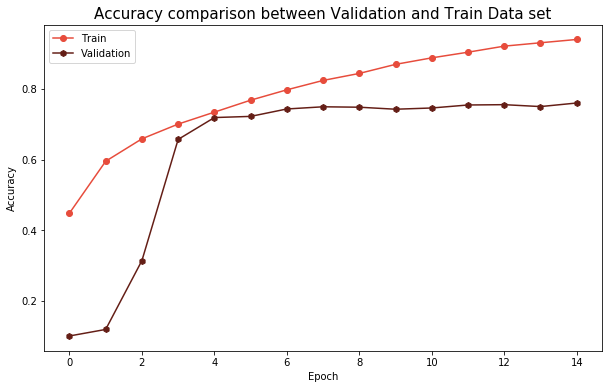

In [14]:
plt.figure(figsize=(10,6))

plt.plot(nndl.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(nndl.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

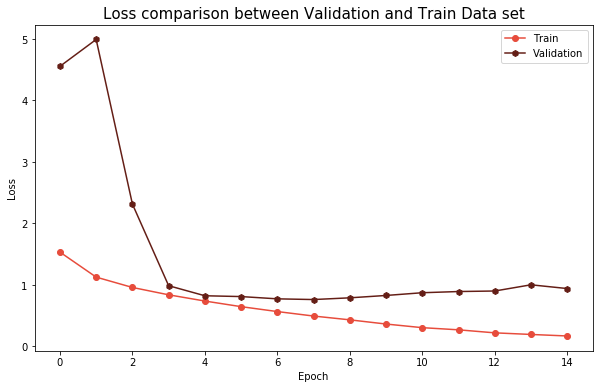

In [17]:
plt.figure(figsize=(10,6))

plt.plot(nndl.history['loss'],color="#E74C3C",marker='o')
plt.plot(nndl.history['val_loss'],color='#641E16',marker='h')
plt.title('Loss comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')
plt.show()

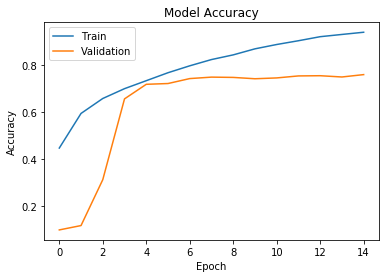

In [15]:
plt.plot(nndl.history['accuracy'])
plt.plot(nndl.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()


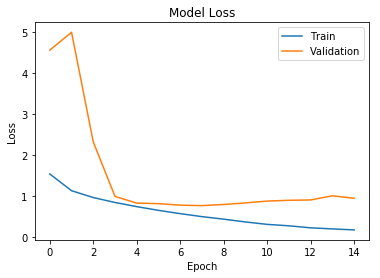

In [16]:
plt.plot(nndl.history['loss'])
plt.plot(nndl.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()


TypeError: Image data cannot be converted to float

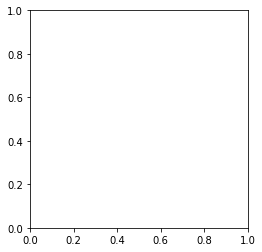

In [28]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plot_confusion_matrix(confusion_matrix,['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'], normalize = True)

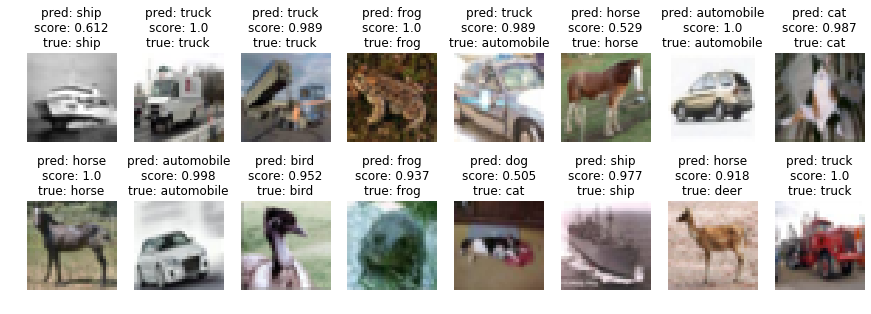

In [34]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

y_pred_test = model.predict_proba(x_te)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)
y_pred_test_max_probas = np.max(y_pred_test, axis=1)

cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(x_test[random_index, :])
        pred_label =  cifar10_classes[y_pred_test_classes[random_index]]
        pred_proba = y_pred_test_max_probas[random_index]
        true_label = cifar10_classes[y_test[random_index, 0]]
        ax.set_title("pred: {}\nscore: {:.3}\ntrue: {}".format(
               pred_label, pred_proba, true_label
        ))
plt.show()